In [ ]:
from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from bs4 import BeautifulSoup # para o pré-processamento
!pip install vaderSentiment
from leia import SentimentIntensityAnalyzer 

s = SentimentIntensityAnalyzer()

# Análise de texto simples
s.polarity_scores('Eu estou feliz')
#{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.6249}

# Análise de texto com emoji :)
s.polarity_scores('Eu estou feliz :)')
#{'neg': 0.0, 'neu': 0.22, 'pos': 0.78, 'compound': 0.7964}

# Análise de texto com negação
s.polarity_scores('Eu não estou feliz')
#{'neg': 0.265, 'neu': 0.241, 'pos': 0.494, 'compound': 0.4404}

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Lula_Ladrao.xlsx")
df.head()

In [ ]:
# função para remover as tags 
def remove_tags(texto):
  
  soup = BeautifulSoup(texto)
  texto_sem_tags = soup.get_text()
  return texto.replace("#", "")

# aplicando a coluna de title
df['title'] = df['title'].apply(remove_tags)

df.head()

In [ ]:
# importando a classe
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# instanciando
analyser = SentimentIntensityAnalyzer()

def analise(texto):
 df_analisado = analyser.polarity_scores(texto)['compound'] 
 return df_analisado

# aplicando a função e guardando na coluna new_title
df['new_title'] = df['title'].apply(analise)
# vamos ver como ficou
df['new_title'] 

In [ ]:
# função que transforma valores maiores que 0 em positive e menores em negative
def analise2(score):
  if score > 0:
    return 'positive'
  elif score == 0:
        return 'neutral'
 
  return 'negative'
 # aplicando
df['new_sentiment'] = df['new_title'].apply(analise2)
df['new_sentiment']

In [ ]:
df['new_sentiment'].value_counts()


neutral     7151
positive    1633
negative    1216
Name: new_sentiment, dtype: int64

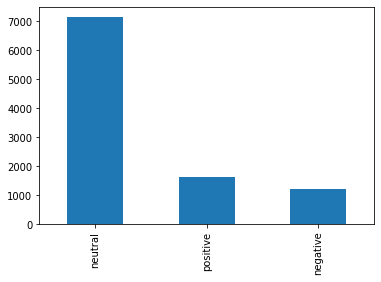

In [ ]:
%matplotlib inline
df['new_sentiment'].value_counts().plot(kind='bar')

In [ ]:
df[['title', 'new_title', 'new_sentiment']].to_excel("lula_ladrao_sentimentos.xlsx")